# Challenge
Please see the README.md in this repository.

# Getting started
## Importing Pandas and loading the training data

In [1]:
import pandas as pd

In [2]:
dataTrain = pd.read_csv('../data/Trainingdata_p4m.csv',';')

## Explore the data set

Feel free to use any search engine to help you with the following tasks!

**Task** Write code to output the number of rows and columns of dataTrain.

In [3]:
print(f'Rows: {len(dataTrain)}')
print(f'Columns: {len(dataTrain.columns)}')

Rows: 9992
Columns: 23


**Task** Get a list of column names.

In [4]:
print(dataTrain.columns)

Index(['Q_Inj [mm3]', 'nEng [rpm]', 'p_transient_1 [bar]',
       'p_transient_2 [bar]', 'p_transient_3 [bar]', 'p_transient_4 [bar]',
       'p_transient_5 [bar]', 'p_transient_6 [bar]', 'p_transient_7 [bar]',
       'p_transient_8 [bar]', 'p_transient_9 [bar]', 'p_transient_10 [bar]',
       'p_transient_11 [bar]', 'p_transient_12 [bar]', 'p_transient_13 [bar]',
       'p_transient_14 [bar]', 'p_transient_15 [bar]', 'p_transient_16 [bar]',
       'p_transient_17 [bar]', 'p_transient_18 [bar]', 'p_transient_19 [bar]',
       'p_transient_20 [bar]', 'phiMI [GradCrA]'],
      dtype='object')


**Task** Calculate the mean of the target 'Q_Inj [mm3]'.

In [5]:
dataTrain['Q_Inj [mm3]'].mean()

114.36204463570857

**Task** Plot a histogram of the target.

<AxesSubplot:>

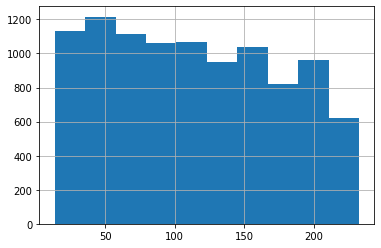

In [6]:
dataTrain['Q_Inj [mm3]'].hist()

**Task** Plot histograms for all columns.

array([[<AxesSubplot:title={'center':'Q_Inj [mm3]'}>,
        <AxesSubplot:title={'center':'nEng [rpm]'}>,
        <AxesSubplot:title={'center':'p_transient_1 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_2 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_3 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_4 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_5 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_6 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_7 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_8 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_9 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_10 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_11 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_12 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_13 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_14 [bar]'}>,
        <AxesSubp

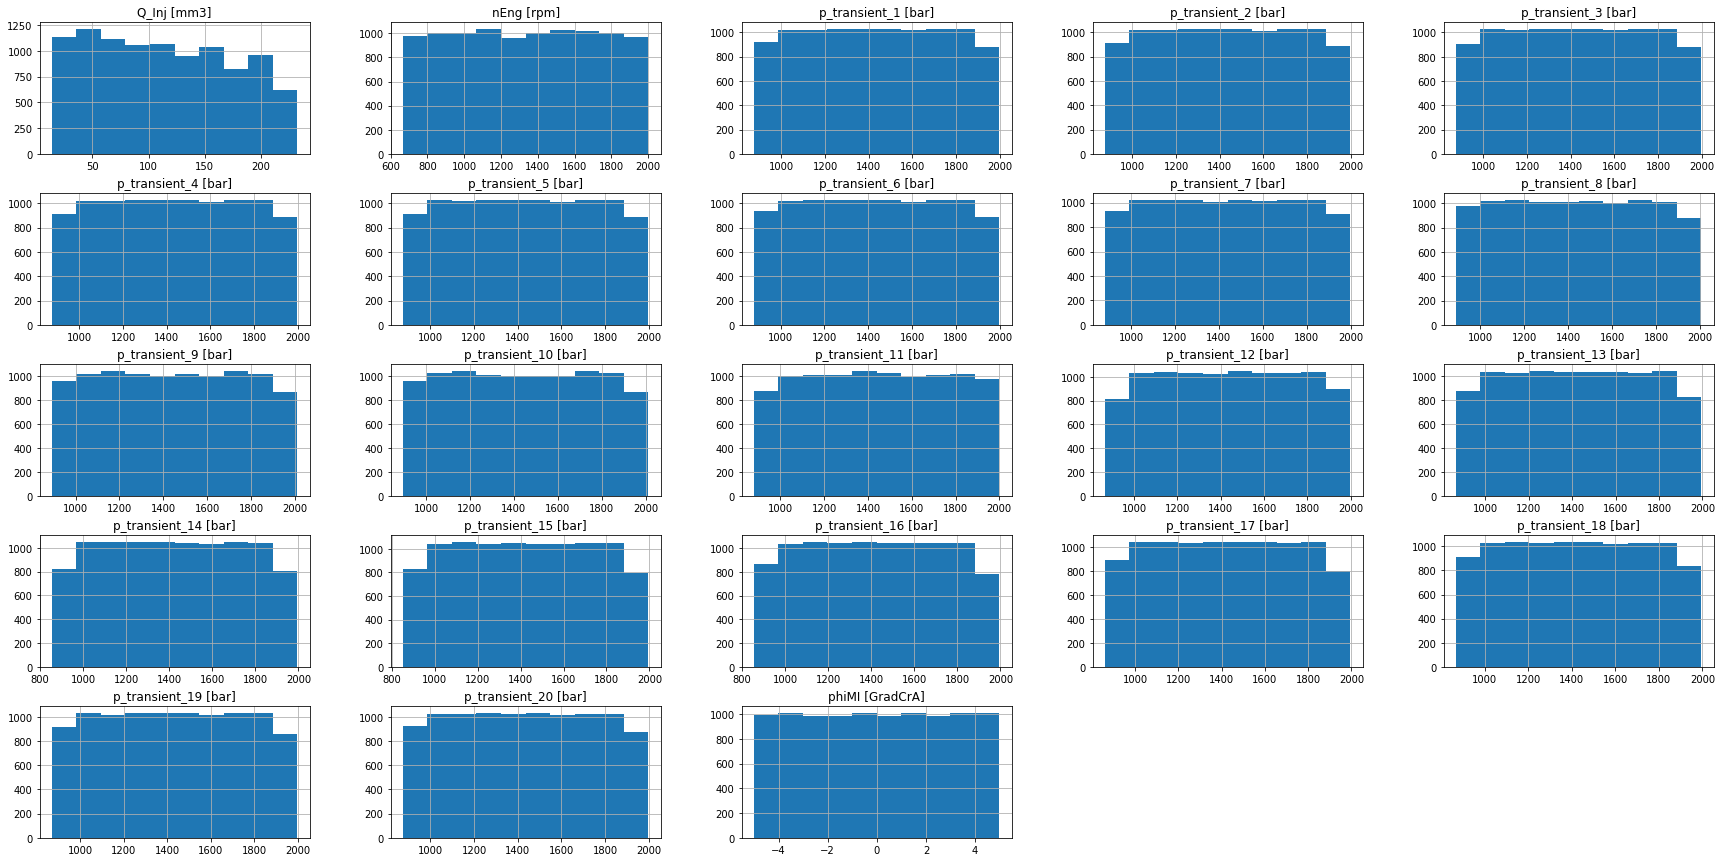

In [7]:
dataTrain.hist(figsize=(30,15))

**Task** Calculate the correlation between the target and all other columns.

In [8]:
data_corrs = dataTrain.corrwith(dataTrain['Q_Inj [mm3]'])
print(data_corrs)

Q_Inj [mm3]             1.000000
nEng [rpm]             -0.014421
p_transient_1 [bar]    -0.053933
p_transient_2 [bar]    -0.054208
p_transient_3 [bar]    -0.053890
p_transient_4 [bar]    -0.053713
p_transient_5 [bar]    -0.053922
p_transient_6 [bar]    -0.051974
p_transient_7 [bar]    -0.043372
p_transient_8 [bar]    -0.035536
p_transient_9 [bar]    -0.031921
p_transient_10 [bar]   -0.030042
p_transient_11 [bar]   -0.033259
p_transient_12 [bar]   -0.045077
p_transient_13 [bar]   -0.058991
p_transient_14 [bar]   -0.069295
p_transient_15 [bar]   -0.074856
p_transient_16 [bar]   -0.075138
p_transient_17 [bar]   -0.067359
p_transient_18 [bar]   -0.059793
p_transient_19 [bar]   -0.056335
p_transient_20 [bar]   -0.054388
phiMI [GradCrA]         0.002289
dtype: float64


**Task** Find out which column (besides the target itself) has the highest absolute correlation with the target.

In [9]:
max_corr_col = data_corrs[2:].abs().idxmax()
print(max_corr_col + ': ' + str(data_corrs[max_corr_col]))

p_transient_16 [bar]: -0.07513776223406757


**Task** Plot the scatter plot between the target and the column from the previous task.

<AxesSubplot:xlabel='Q_Inj [mm3]', ylabel='p_transient_16 [bar]'>

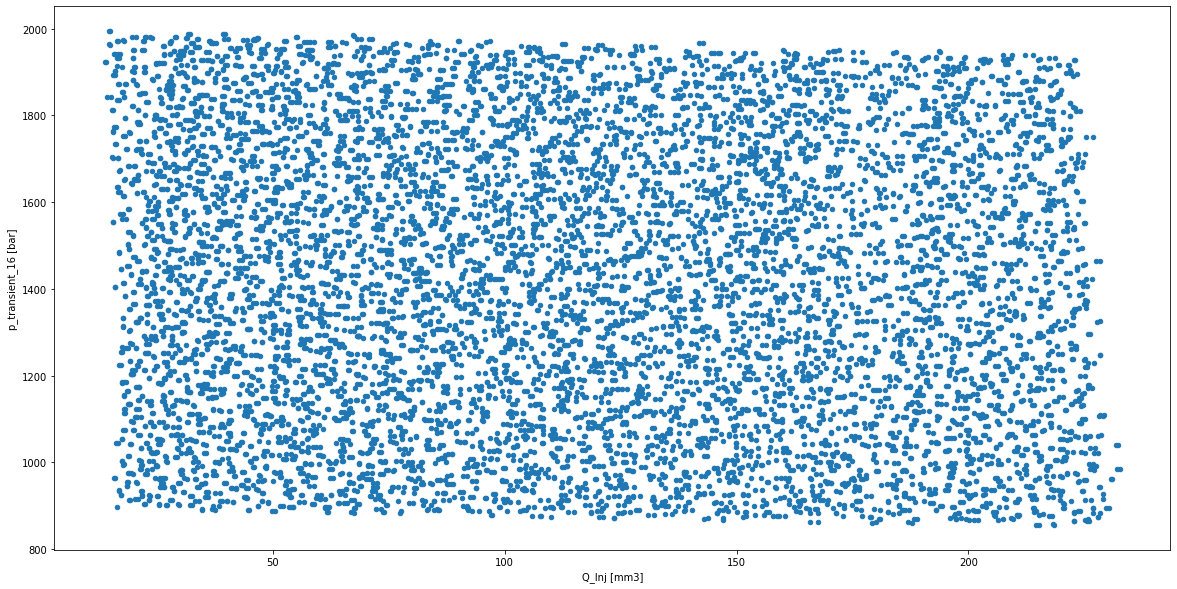

In [10]:
dataTrain.plot.scatter('Q_Inj [mm3]', max_corr_col, figsize=(20,10))

**Task** Does the scatter plot or the correlations look promising, for predicting the target?

Think about the answer before scrolling further.

You need more domain knowledge to preprocess the data further.
The first information you get is:
**Domain Knowledge** In each row of the dataset, the columns named *p_transient_x [bar]* form a time series.

**Task** Visualize the p_transient time series for a single row.

<AxesSubplot:>

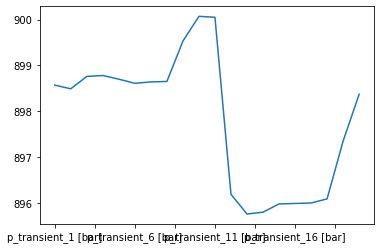

In [11]:
transients = [f"p_transient_{i} [bar]" for i in range(1, 21)] # a list of relevant column names for your convenience
# Your code here
dataTrain.iloc[0][transients].plot.line()

**Task** Visualize the p_transient time series for a few more rows.

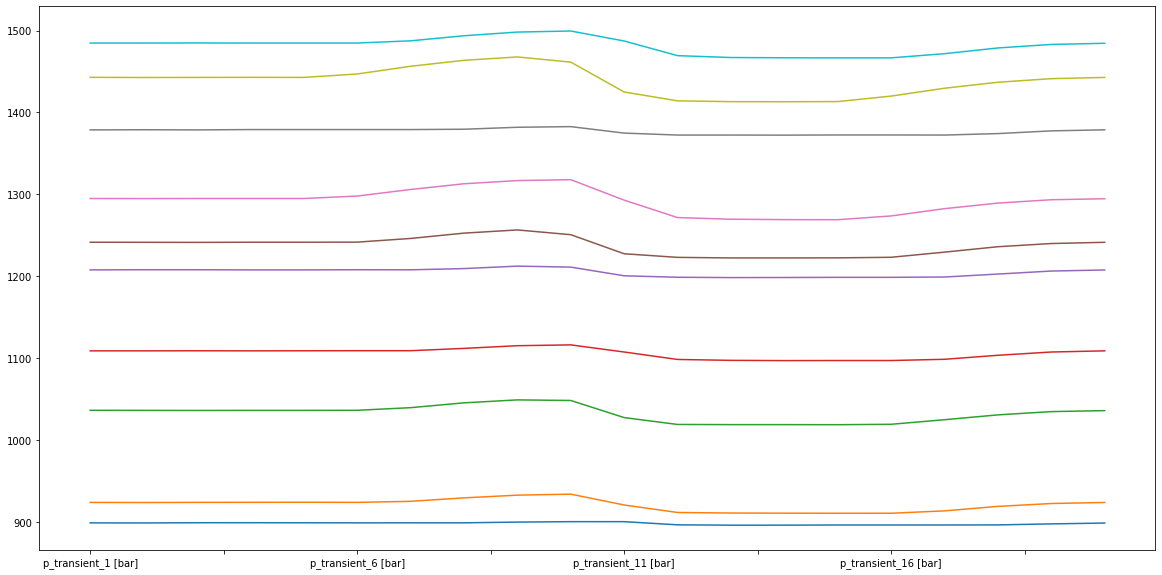

In [12]:
for i in range(10):
    dataTrain.iloc[i][transients].plot.line(figsize=(20,10))

**Domain Knowledge** For our target, the variations within individual time series are more important than across time series.
You come up with the following preprocessing function to adjust your data accordingly:

In [13]:
def preprocess(df):
    transients = [f"p_transient_{i} [bar]" for i in range(1, 21)]
    # shift the time series, so that the maximum of each series is at 0.
    df.loc[:,transients] = df.loc[:, transients].sub(df.loc[:, transients].max(axis=1), axis=0)
    return df

**Task** Apply that function to dataTrain, so that dataTrain contains the preprocessed data.

In [14]:
df = preprocess(dataTrain)
print(df)

      Q_Inj [mm3]  nEng [rpm]  p_transient_1 [bar]  p_transient_2 [bar]  \
0          16.392      666.52                -1.50                -1.58   
1          97.783      666.62               -10.09               -10.23   
2         127.230      666.74               -12.70               -12.80   
3          72.702      666.63                -7.30                -7.30   
4          55.636      666.60                -4.60                -4.40   
...           ...         ...                  ...                  ...   
9987       52.188     1973.80                -8.63                -9.56   
9988      117.520     1973.80               -16.01               -15.36   
9989      218.470     1973.80               -24.69               -24.21   
9990      165.620     1973.80               -20.90               -20.40   
9991       30.380     1973.80                -6.50                -6.50   

      p_transient_3 [bar]  p_transient_4 [bar]  p_transient_5 [bar]  \
0                   -1.31   

**Task** Visualize a few of the time series again. What is the difference to before?

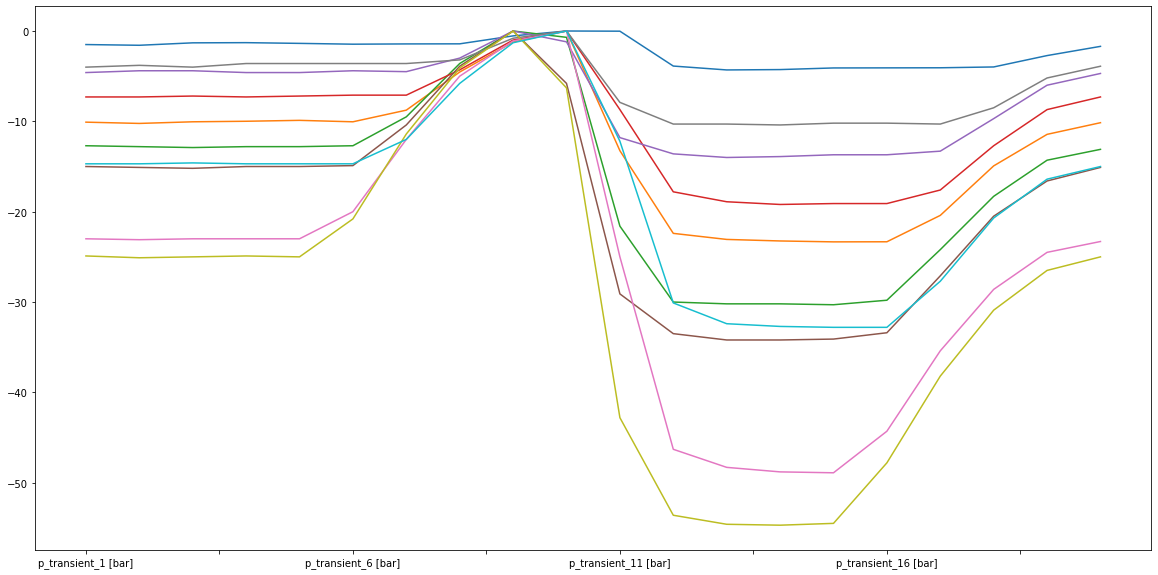

In [15]:
for i in range(10):
    df.iloc[i][transients].plot.line(figsize=(20,10))

**Task** Calculate correlations again. What changed?

In [16]:
data_corrs_p = df.corrwith(df['Q_Inj [mm3]'])
print(data_corrs_p)

Q_Inj [mm3]             1.000000
nEng [rpm]             -0.014421
p_transient_1 [bar]    -0.960216
p_transient_2 [bar]    -0.964476
p_transient_3 [bar]    -0.963915
p_transient_4 [bar]    -0.963649
p_transient_5 [bar]    -0.964368
p_transient_6 [bar]    -0.954226
p_transient_7 [bar]    -0.858219
p_transient_8 [bar]    -0.625031
p_transient_9 [bar]    -0.300297
p_transient_10 [bar]   -0.047634
p_transient_11 [bar]   -0.145823
p_transient_12 [bar]   -0.387571
p_transient_13 [bar]   -0.683797
p_transient_14 [bar]   -0.883044
p_transient_15 [bar]   -0.950615
p_transient_16 [bar]   -0.968149
p_transient_17 [bar]   -0.956354
p_transient_18 [bar]   -0.948497
p_transient_19 [bar]   -0.945579
p_transient_20 [bar]   -0.951938
phiMI [GradCrA]         0.002289
dtype: float64


**Task** Create a scatter plot between the target and any of the highly correlated feature columns.

p_transient_16 [bar]


<AxesSubplot:xlabel='Q_Inj [mm3]', ylabel='p_transient_16 [bar]'>

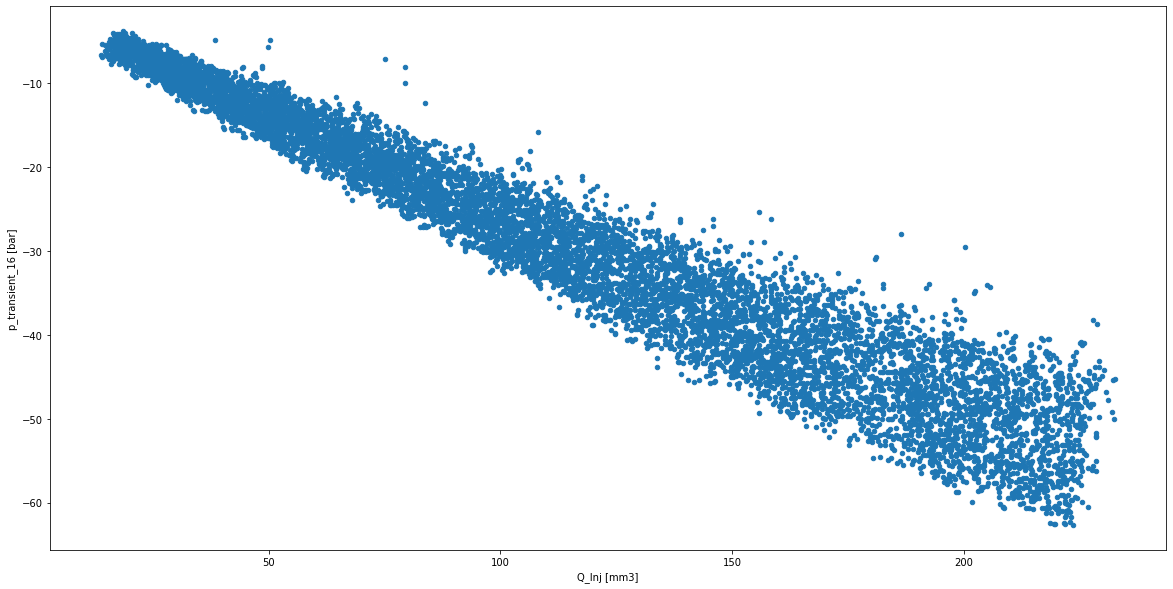

In [17]:
max_corr_col_p = data_corrs_p[2:].abs().idxmax()
print(max_corr_col_p)
df.plot.scatter('Q_Inj [mm3]', max_corr_col_p, figsize=(20,10))



# First ML

**Task** Create a dataframe *dataTrainX* containing only the feature columns.

['nEng [rpm]', 'p_transient_1 [bar]', 'p_transient_2 [bar]', 'p_transient_3 [bar]', 'p_transient_4 [bar]', 'p_transient_5 [bar]', 'p_transient_6 [bar]', 'p_transient_7 [bar]', 'p_transient_8 [bar]', 'p_transient_9 [bar]', 'p_transient_10 [bar]', 'p_transient_11 [bar]', 'p_transient_12 [bar]', 'p_transient_13 [bar]', 'p_transient_14 [bar]', 'p_transient_15 [bar]', 'p_transient_16 [bar]', 'p_transient_17 [bar]', 'p_transient_18 [bar]', 'p_transient_19 [bar]', 'p_transient_20 [bar]', 'phiMI [GradCrA]']
      nEng [rpm]  p_transient_1 [bar]  p_transient_2 [bar]  \
0         666.52                -1.50                -1.58   
1         666.62               -10.09               -10.23   
2         666.74               -12.70               -12.80   
3         666.63                -7.30                -7.30   
4         666.60                -4.60                -4.40   
...          ...                  ...                  ...   
9987     1973.80                -8.63                -9.56   

array([[<AxesSubplot:title={'center':'nEng [rpm]'}>,
        <AxesSubplot:title={'center':'p_transient_1 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_2 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_3 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_4 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_5 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_6 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_7 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_8 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_9 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_10 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_11 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_12 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_13 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_14 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_15 [bar]'}>,
        

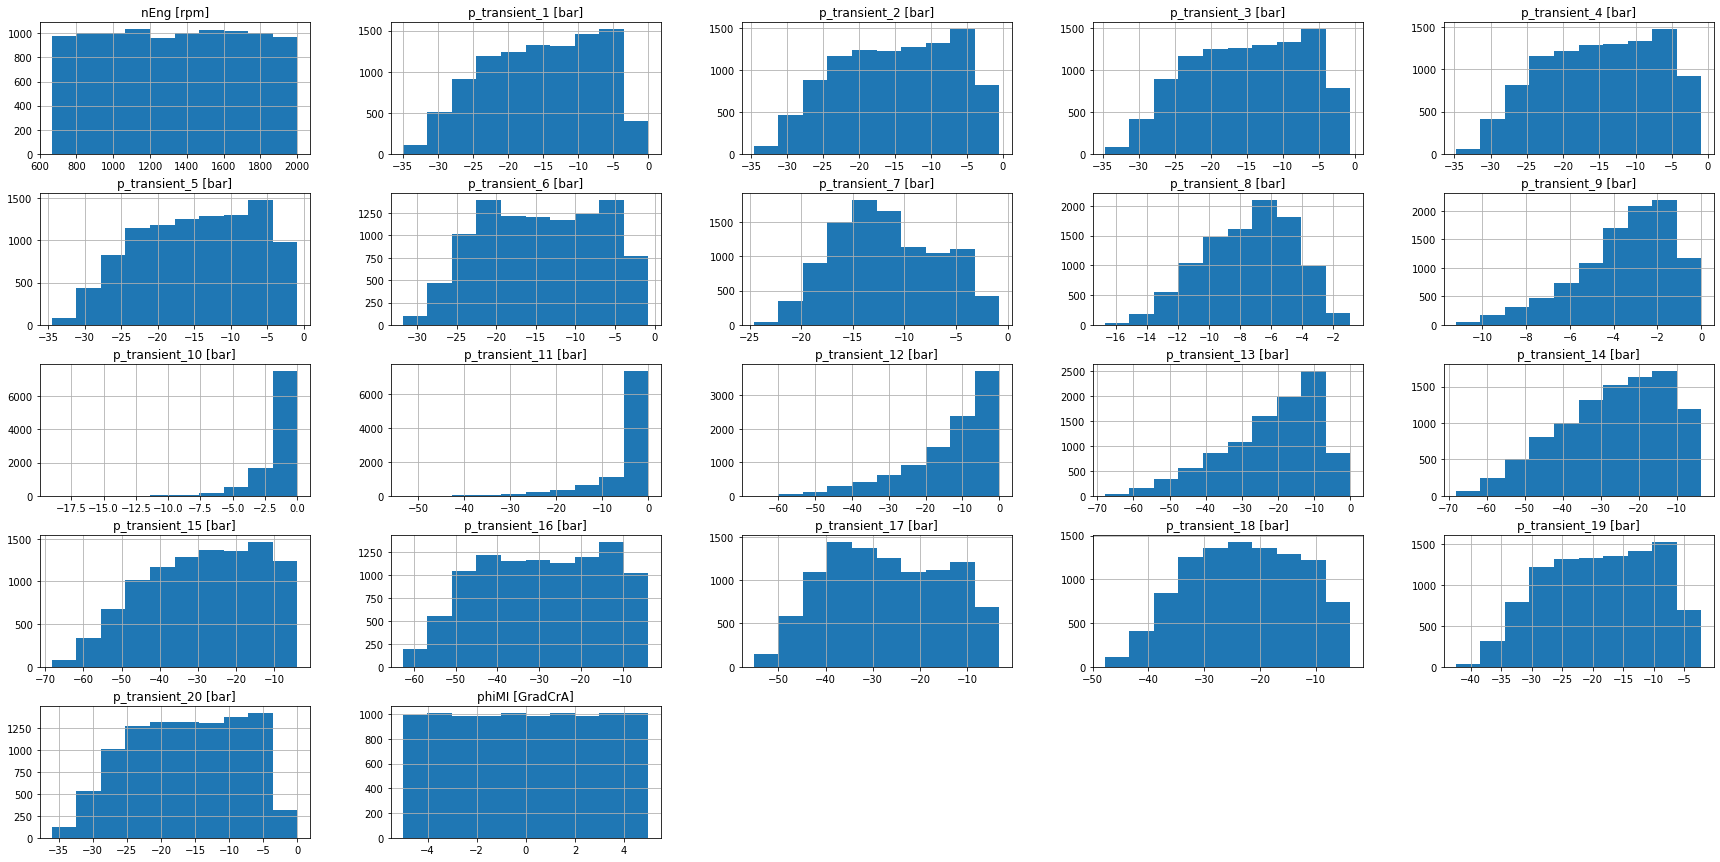

In [23]:
dataTrain = pd.read_csv('../data/Trainingdata_p4m.csv',';')
xcols = list(df.columns)[1:]
print(xcols)
dataTrainX = df[xcols]
print(dataTrainX)
dataTrainX.hist(figsize=(30,15))

**Task** Create a pandas series *dataTrainY* consisting of only the target column.

In [24]:
dataTrainY = df['Q_Inj [mm3]']

[b'16.392' b'97.782' b'127.23' ... b'218.47' b'165.62' b'30.38']


**Task** Import from scikit learn: MinMax-Scaler and (MLP) Multi-Layer Perceptron.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor


**Task** Fit and apply the MinMax-Scaler to *dataTrainX*

C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

      nEng [rpm]  p_transient_1 [bar]  p_transient_2 [bar]  \
0       0.000000             0.957143             0.968328   
1       0.000075             0.711714             0.714663   
2       0.000165             0.637143             0.639296   
3       0.000082             0.791429             0.800587   
4       0.000060             0.868571             0.885630   
...          ...                  ...                  ...   
9987    0.980058             0.753429             0.734311   
9988    0.980058             0.542571             0.564223   
9989    0.980058             0.294571             0.304692   
9990    0.980058             0.402857             0.416422   
9991    0.980058             0.814286             0.824047   

      p_transient_3 [bar]  p_transient_4 [bar]  p_transient_5 [bar]  \
0                0.979179             0.989079             0.986012   
1                0.722874             0.732290             0.732440   
2                0.639296             0.64

array([[<AxesSubplot:title={'center':'nEng [rpm]'}>,
        <AxesSubplot:title={'center':'p_transient_1 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_2 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_3 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_4 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_5 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_6 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_7 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_8 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_9 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_10 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_11 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_12 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_13 [bar]'}>,
        <AxesSubplot:title={'center':'p_transient_14 [bar]'}>],
       [<AxesSubplot:title={'center':'p_transient_15 [bar]'}>,
        

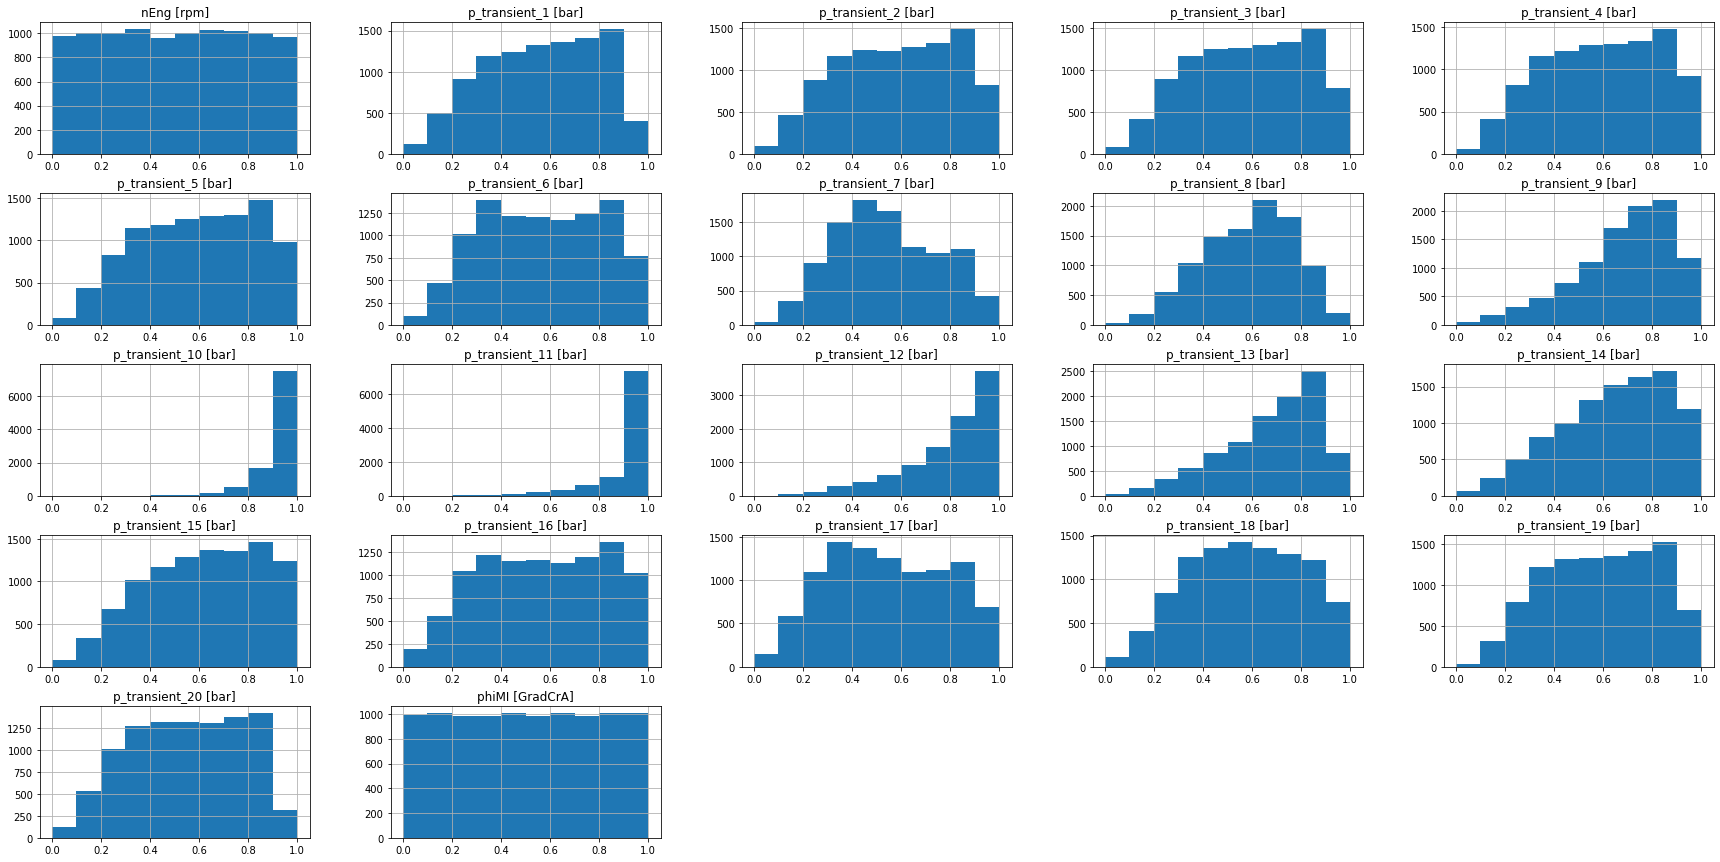

In [26]:
scaler = MinMaxScaler().fit(dataTrainX)
dataTrainX[xcols] = scaler.fit_transform(dataTrainX)
print(dataTrainX)
dataTrainX.hist(figsize=(30,15))

**Task** Initialize a MLP.

In [81]:
# clf = MLPRegressor(max_iter=1000)
clf = MLPRegressor(max_iter=10000,hidden_layer_sizes=(10,5)) 
 



**Task** Fit the MLP on the training data.

In [82]:
clf.fit(dataTrainX,dataTrainY)

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=10000)

In [83]:
res = clf.predict(dataTrainX)
results = pd.DataFrame(dataTrainY)
results['prediction'] = res
results['precision']= (results['prediction']-results['Q_Inj [mm3]'])/results['Q_Inj [mm3]']*100
print(results)
print(results['precision'].describe())

      Q_Inj [mm3]  prediction  precision
0          16.392    6.805191 -58.484680
1          97.783   93.415909  -4.466105
2         127.230  117.214916  -7.871637
3          72.702   74.222274   2.091103
4          55.636   52.368740  -5.872564
...           ...         ...        ...
9987       52.188   45.058587 -13.661019
9988      117.520  101.455871 -13.669273
9989      218.470  213.667579  -2.198206
9990      165.620  166.444394   0.497763
9991       30.380   29.090779  -4.243651

[9992 rows x 3 columns]
count    9992.000000
mean        0.052661
std         6.998954
min       -58.484680
25%        -2.949134
50%        -0.098158
75%         2.459315
max        94.201592
Name: precision, dtype: float64


# First Evaluation

**Task** Load the test set (it's in the same folder as the training set) into a dataframe *dataTest*.

In [74]:
dataTest = pd.read_csv('../data/Testdata_p4m.csv',';')
dataTest = dataTest.drop(columns=['Unnamed: 23'])


Index(['Q_Inj [mm3]', 'nEng [rpm]', 'p_transient_1 [bar]',
       'p_transient_2 [bar]', 'p_transient_3 [bar]', 'p_transient_4 [bar]',
       'p_transient_5 [bar]', 'p_transient_6 [bar]', 'p_transient_7 [bar]',
       'p_transient_8 [bar]', 'p_transient_9 [bar]', 'p_transient_10 [bar]',
       'p_transient_11 [bar]', 'p_transient_12 [bar]', 'p_transient_13 [bar]',
       'p_transient_14 [bar]', 'p_transient_15 [bar]', 'p_transient_16 [bar]',
       'p_transient_17 [bar]', 'p_transient_18 [bar]', 'p_transient_19 [bar]',
       'p_transient_20 [bar]', 'phiMI [GradCrA]'],
      dtype='object')


**Task** Apply the time series preprocessing to the test set.

Q_Inj [mm3]             1.000000
nEng [rpm]             -0.050062
p_transient_1 [bar]    -0.963973
p_transient_2 [bar]    -0.960952
p_transient_3 [bar]    -0.959887
p_transient_4 [bar]    -0.965347
p_transient_5 [bar]    -0.972266
p_transient_6 [bar]    -0.958204
p_transient_7 [bar]    -0.859002
p_transient_8 [bar]    -0.585765
p_transient_9 [bar]    -0.182529
p_transient_10 [bar]   -0.130385
p_transient_11 [bar]    0.071241
p_transient_12 [bar]   -0.409380
p_transient_13 [bar]   -0.851778
p_transient_14 [bar]   -0.946366
p_transient_15 [bar]   -0.968892
p_transient_16 [bar]   -0.973602
p_transient_17 [bar]   -0.960144
p_transient_18 [bar]   -0.967799
p_transient_19 [bar]   -0.961087
p_transient_20 [bar]   -0.969549
phiMI [GradCrA]         0.003705
dtype: float64
p_transient_16 [bar]


<AxesSubplot:xlabel='Q_Inj [mm3]', ylabel='p_transient_16 [bar]'>

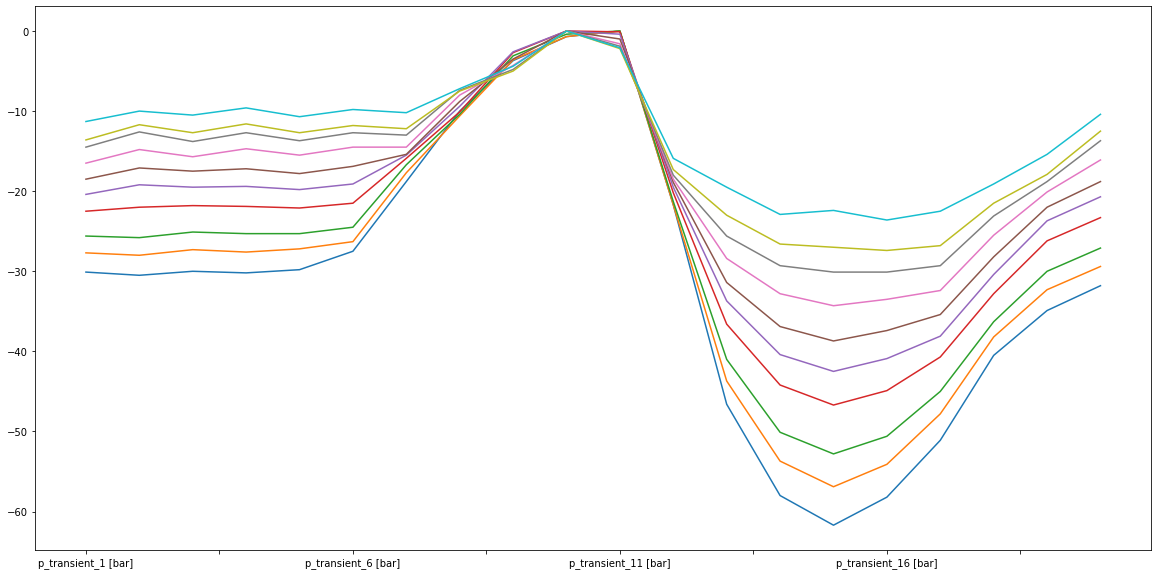

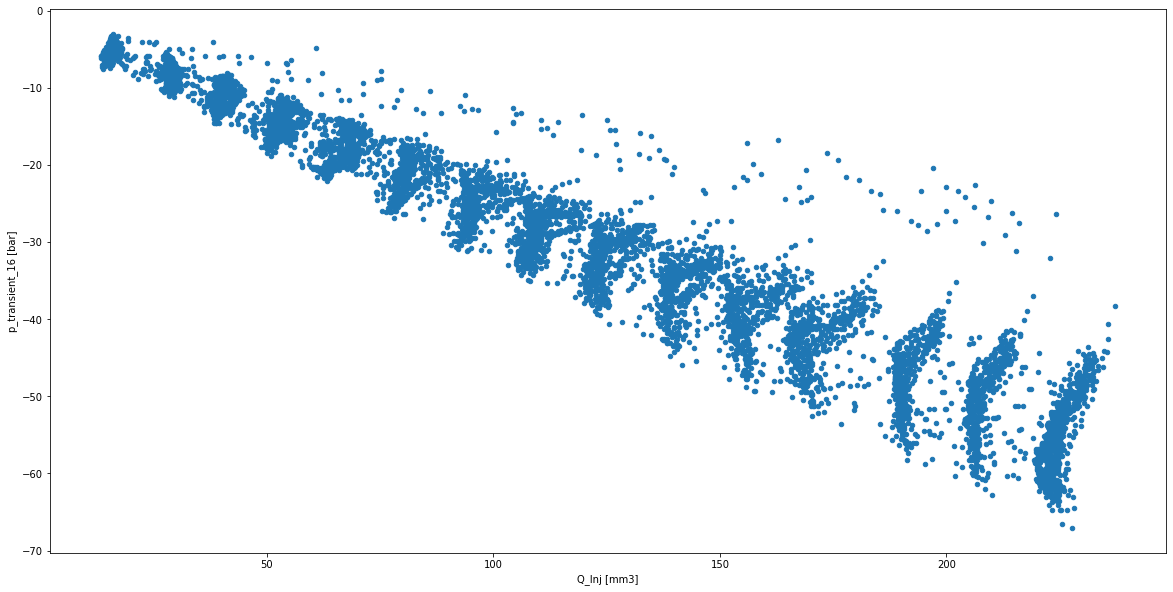

In [80]:
df_test = preprocess(dataTest)
for i in range(10):
    df_test.iloc[i][transients].plot.line(figsize=(20,10))
data_corrs_p = df_test.corrwith(df_test['Q_Inj [mm3]'])
print(data_corrs_p)
max_corr_col_p = data_corrs_p[2:].abs().idxmax()
print(max_corr_col_p)
df_test.plot.scatter('Q_Inj [mm3]', max_corr_col_p, figsize=(20,10))

**Task** Split *dataTest* into *dataTestX* and *dataTestY*.

In [76]:
xcols = list(df.columns)[1:]
df_testX = df_test[xcols]
df_testY = df_test['Q_Inj [mm3]']

**Task** Apply the MinMax scaler to *dataTestX*.

In [77]:
scaler_test = MinMaxScaler().fit(df_testX)
df_testX[xcols] = scaler.fit_transform(df_testX)

C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\dvj2bj\.conda\envs\p4m\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

**Task** Predict on *dataTestX*.

In [84]:
res_test= clf.predict(df_testX)


**Task** Evaluate your prediction.

In [85]:
results_test = pd.DataFrame(df_testY)
results_test['prediction'] = res_test
results_test['precision']= (results_test['prediction']-results_test['Q_Inj [mm3]'])/results_test['Q_Inj [mm3]']*100
print(results_test)
print(results_test['precision'].describe())

       Q_Inj [mm3]  prediction  precision
0           222.31  311.473596  40.107776
1           203.08  289.583559  42.595804
2           187.25  273.650636  46.141861
3           166.01  249.049928  50.021040
4           152.17  230.783767  51.661804
...            ...         ...        ...
13349       155.09  217.354371  40.147250
13350       154.48  217.565963  40.837625
13351       154.89  217.048162  40.130520
13352       155.40  216.375717  39.237913
13353       154.96  218.232834  40.831721

[13354 rows x 3 columns]
count    13354.000000
mean        60.890177
std         37.459604
min       -253.277292
25%         40.696421
50%         53.347468
75%         70.126760
max        317.490204
Name: precision, dtype: float64
